### Get scale limit for a mobile re-captured image
1. Zoom in initial scale.
2. Crop image w/ current scale.
3. Execute FFT & calculate wave length of the cropped image.
4. Get pixel width in x-y axes.
5. Optimize scale to obtain 10-pixel width and 10-pixel height (iterate Step 2 to 4).

Reading image to align :  snipping\source.png


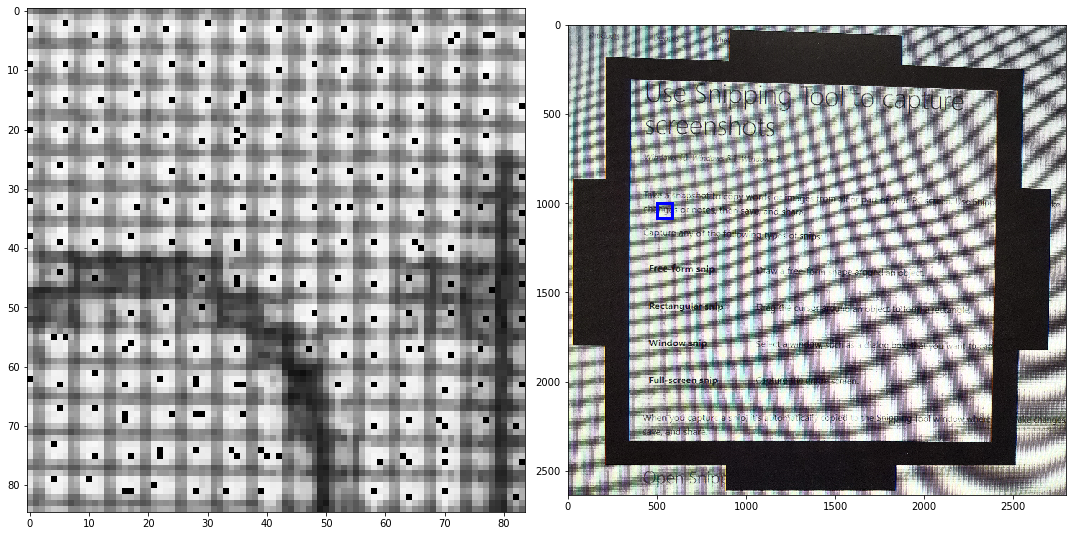

In [3]:
from pre_process import *
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage.feature import peak_local_max

dirName = "snipping"
imFilename = os.path.join(dirName, "source.png")

print("Reading image to align : ", imFilename);  
im = cv2.imread(imFilename, cv2.IMREAD_COLOR)

pim = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
height, width = pim.shape
n_pixel = 15
        
coordinates = np.array(peak_local_max(pim, min_distance=3))
M = np.ceil(np.sqrt(coordinates.shape[0]))
N = coordinates.shape[0]

d = np.sqrt(width*height/N)
    
nx, ny = tuple(np.array([width, height]) // int(d * n_pixel))

height, width = pim.shape

y_off, x_off = (500, 1000)
h, w = (height//ny, width//nx)
rect = patches.Rectangle((y_off, x_off), h, w, linewidth=3, edgecolor='b', facecolor='none')

_, axes = plt.subplots(ncols=2, figsize=(15,15))
for y, x in coordinates:
    pim[y, x] = 0
axes[0].imshow(pim[y_off:y_off+h, x_off:x_off+w], 'gray')
axes[1].imshow(im)
axes[1].add_patch(rect)
plt.tight_layout()
plt.savefig('pixel_monitor_to_camera.pdf', bbox_inches='tight', pad_inches=0, dpi=300)

### Peak coordinates

In [38]:
coordinates

array([[2632, 2782],
       [2632, 2415],
       [2632, 2393],
       ...,
       [   3,  216],
       [   3,  215],
       [   3,   24]], dtype=int64)

#### Camera pixel size per Monitor pixel

In [39]:
d

5.571272767207455